In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv('Border_Crossing_Entry_Data.csv')

In [30]:
df.head(5)

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928)
1,Del Rio,Texas,2302,US-Mexico Border,Dec 2023,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784)
2,Roma,Texas,2310,US-Mexico Border,Nov 2023,Trucks,3753,26.404,-99.019,POINT (-99.018981 26.403928)
3,Douglas,Arizona,2601,US-Mexico Border,Oct 2023,Buses,13,31.334,-109.560,POINT (-109.560344 31.334043)
4,Beecher Falls,Vermont,206,US-Canada Border,Aug 2023,Trucks,422,45.013,-71.505,POINT (-71.505309 45.013411)


In [31]:
df['Month']=df['Date'].str.split().str[0]

In [32]:
df['Year']=df['Date'].str.split().str[1]

In [33]:
df.head(5)

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Month,Year
0,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928),Dec,2023
1,Del Rio,Texas,2302,US-Mexico Border,Dec 2023,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784),Dec,2023
2,Roma,Texas,2310,US-Mexico Border,Nov 2023,Trucks,3753,26.404,-99.019,POINT (-99.018981 26.403928),Nov,2023
3,Douglas,Arizona,2601,US-Mexico Border,Oct 2023,Buses,13,31.334,-109.560,POINT (-109.560344 31.334043),Oct,2023
4,Beecher Falls,Vermont,206,US-Canada Border,Aug 2023,Trucks,422,45.013,-71.505,POINT (-71.505309 45.013411),Aug,2023


In [34]:
df.to_csv('Border_Crossing.csv', index=False)

In [21]:
df.columns

Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value',
       'Latitude', 'Longitude', 'Point', 'month', 'Year'],
      dtype='object')

In [38]:
# Check for duplicated rows based on 'Port Name', 'State', 'Port Code', 'month', and 'Year'
duplicates = df[df.duplicated(subset=['Port Name', 'State', 'Port Code', 'Month', 'Year'], keep=False)]

# Display duplicated rows
print("Duplicated rows based on 'Port Name', 'State', 'Port Code', 'Month', and 'Year':")
print(duplicates)

Duplicated rows based on 'Port Name', 'State', 'Port Code', 'Month', and 'Year':
             Port Name       State  Port Code            Border      Date  \
0                 Roma       Texas       2310  US-Mexico Border  Dec 2023   
1              Del Rio       Texas       2302  US-Mexico Border  Dec 2023   
2                 Roma       Texas       2310  US-Mexico Border  Nov 2023   
3              Douglas     Arizona       2601  US-Mexico Border  Oct 2023   
4        Beecher Falls     Vermont        206  US-Canada Border  Aug 2023   
...                ...         ...        ...               ...       ...   
391038        Oroville  Washington       3019  US-Canada Border  Mar 2024   
391039       Lukeville     Arizona       2602  US-Mexico Border  Mar 2024   
391040         Warroad   Minnesota       3423  US-Canada Border  Mar 2024   
391041  Fort Fairfield       Maine        107  US-Canada Border  Mar 2024   
391042   Calexico East  California       2507  US-Mexico Border  Mar 202

In [20]:
df.isnull().any()

Port Name    False
State        False
Port Code    False
Border       False
Date         False
Measure      False
Value        False
Latitude     False
Longitude    False
Point        False
month        False
Year         False
dtype: bool

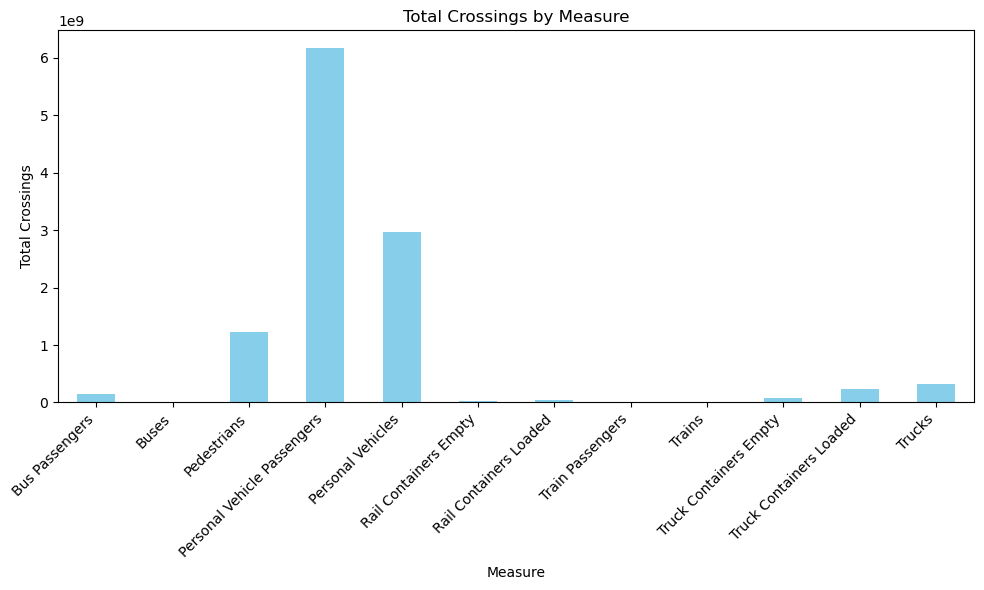

In [27]:
measure_totals = df.groupby('Measure')['Value'].sum()

# Plotting
plt.figure(figsize=(10, 6))
measure_totals.plot(kind='bar', color='skyblue')
plt.title('Total Crossings by Measure')
plt.xlabel('Measure')
plt.ylabel('Total Crossings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
measure_totals

Measure
Bus Passengers                  154327446
Buses                             9234156
Pedestrians                    1219921827
Personal Vehicle Passengers    6168460727
Personal Vehicles              2962942561
Rail Containers Empty            28006635
Rail Containers Loaded           49370325
Train Passengers                  6936820
Trains                            1059963
Truck Containers Empty           81438845
Truck Containers Loaded         227378531
Trucks                          315730505
Name: Value, dtype: int64

In [18]:
df.to_csv('Border_Crossing.csv', index=False)